In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import ccxt
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os

In [3]:
if os.path.exists('BTC_USDT_15m_data.csv'):
    print("BTC/USDT data is already in the folder. Loading the data...")
    df = pd.read_csv('BTC_USDT_15m_data.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    print("Data loaded.")
else:
    print("BTC/USDT data is not in the folder. Downloading the data...")
    exchange = ccxt.binance()

    symbol = 'BTC/USDT'
    timeframe = '15m'

    limit = 1000 # Maximum limit per request
    since = exchange.parse8601('2019-01-01T00:00:00Z')
    all_candles = []

    while since < exchange.milliseconds():
        try:
            # Fetch OHLCV data
            candles = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
            if not candles:
                break

            all_candles += candles

            # Update 'since' to the timestamp of the last fetched candles
            since = candles[-1][0] + 1

            # Sleep to avoid hitting the rate limit
            time.sleep(exchange.rateLimit / 1000)

        except Exception as e:
            print(f"Error: {e}")
            break

    df = pd.DataFrame(all_candles, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert for readable
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

    # Save to CSV
    df.to_csv('BTC_USDT_15m_data.csv', index=False)
    print("Finishing download and loaded BTC data.")

BTC/USDT data is not in the folder. Downloading the data...
Finishing download and loaded BTC data.


In [4]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,203250,203250.000000,203250.000000,203250.000000,203250.000000,203250.000000
mean,2021-11-26 18:20:33.901106688,29524.826128,29590.481251,29456.725215,29525.146775,821.234649
min,2019-01-01 00:00:00,3366.630000,3373.840000,3349.920000,3366.410000,0.000000
25%,2020-06-14 23:33:45,10353.120000,10373.615000,10331.252500,10353.060000,235.525393
50%,2021-11-27 08:22:30,26749.955000,26785.050000,26716.570000,26749.990000,426.558775
75%,2023-05-10 16:41:15,43724.717500,43815.950000,43641.987500,43725.110000,875.470147
max,2024-10-20 23:45:00,73607.800000,73777.000000,73400.000000,73607.800000,40371.405060
std,NaN,19605.882289,19648.296609,19561.819439,19605.993708,1223.778706


In [25]:
print(df.size)
print(df.shape)

1422750
(203250, 7)


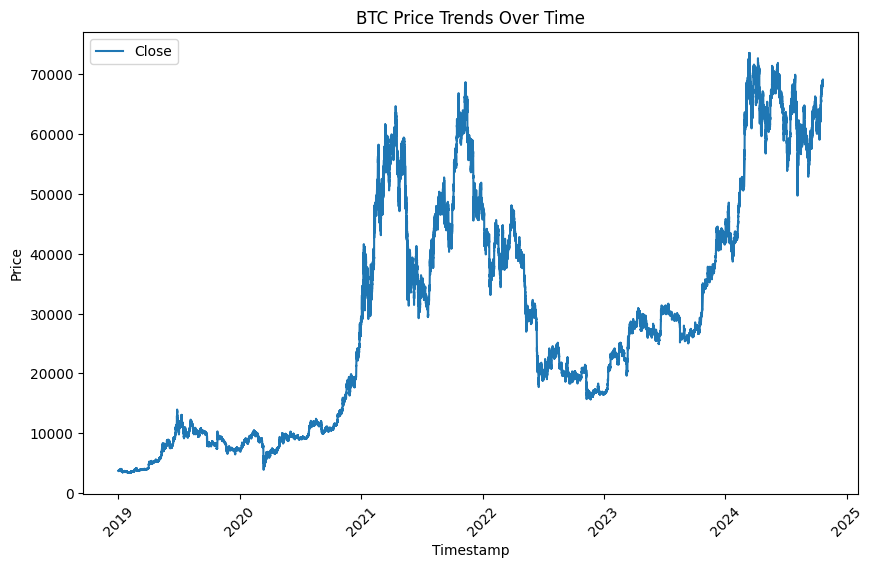

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Close'], label='Close')
plt.title("BTC Price Trends Over Time")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Training set and test set: 80/20

In [11]:
import math
length = df.shape[0]

train_length = math.floor(length * 0.8)

df_train = df[:train_length]
df_test = df[train_length + 1:]

In [12]:
print(df_train.head())
print(df_test.head())

            Timestamp     Open     High      Low    Close      Volume
0 2019-01-01 00:00:00  3701.23  3703.72  3689.88  3697.31  190.974095
1 2019-01-01 00:15:00  3697.91  3698.75  3690.56  3694.20  131.742721
2 2019-01-01 00:30:00  3693.96  3705.00  3693.00  3702.39  171.877714
3 2019-01-01 00:45:00  3702.05  3713.00  3695.02  3700.31  191.772890
4 2019-01-01 01:00:00  3700.20  3702.73  3691.22  3701.03  139.872706
                 Timestamp      Open      High       Low     Close      Volume
162601 2023-08-24 13:45:00  26312.00  26358.53  26291.39  26356.52   415.08298
162602 2023-08-24 14:00:00  26356.52  26374.00  26273.07  26304.17   561.40250
162603 2023-08-24 14:15:00  26304.17  26311.32  26201.19  26201.67   681.88914
162604 2023-08-24 14:30:00  26201.68  26215.66  26073.01  26076.79  1397.37996
162605 2023-08-24 14:45:00  26076.79  26180.00  26073.00  26116.05   735.72251


In [13]:
df_train.describe()

,Timestamp,Open,High,Low,Close,Volume
count,162600,162600.000000,162600.000000,162600.000000,162600.000000,162600.000000
mean,2021-04-28 21:16:19.876383488,23893.817910,23953.987274,23831.562489,23893.957029,935.980009
min,2019-01-01 00:00:00,3366.630000,3373.840000,3349.920000,3366.410000,0.000000
25%,2020-02-29 22:26:15,9435.190000,9451.870000,9419.267500,9435.455000,276.952250
50%,2021-04-29 08:37:30,20223.310000,20269.780000,20177.675000,20223.630000,494.274176
75%,2022-06-27 01:33:45,35763.730000,35896.077500,35604.600000,35764.070000,1033.663276
max,2023-08-24 13:15:00,68718.890000,69000.000000,68480.000000,68718.900000,40371.405060
std,NaN,16365.431106,16412.464546,16317.063564,16365.355649,1326.035629


In [14]:
df_test.describe()

,Timestamp,Open,High,Low,Close,Volume
count,40649,40649.000000,40649.000000,40649.000000,40649.000000,40649.000000
mean,2024-03-23 06:45:00,52049.490670,52137.090863,51958.007102,52050.538934,362.247522
min,2023-08-24 13:45:00,25014.990000,25075.000000,24901.000000,25014.990000,9.188220
25%,2023-12-08 10:15:00,40830.130000,40945.410000,40718.000000,40831.770000,139.860840
50%,2024-03-23 06:45:00,58135.300000,58248.000000,58024.010000,58135.450000,235.421280
75%,2024-07-07 03:15:00,64428.640000,64550.010000,64323.170000,64428.680000,419.138030
max,2024-10-20 23:45:00,73607.800000,73777.000000,73400.000000,73607.800000,13289.889260
std,NaN,14712.928098,14744.220653,14679.239945,14712.614006,437.463372


In [16]:
df['log_return'] = np.log(df['Close']).shift(-1) / df['Close']
df_train = df[:train_length]
df_test = df[train_length + 1:]

In [17]:
df_train.describe()

,Timestamp,Open,High,Low,Close,Volume,log_return
count,162600,162600.000000,162600.000000,162600.000000,162600.000000,162600.000000,162600.000000
mean,2021-04-28 21:16:19.876383488,23893.817910,23953.987274,23831.562489,23893.957029,935.980009,0.000688
min,2019-01-01 00:00:00,3366.630000,3373.840000,3349.920000,3366.410000,0.000000,0.000162
25%,2020-02-29 22:26:15,9435.190000,9451.870000,9419.267500,9435.455000,276.952250,0.000293
50%,2021-04-29 08:37:30,20223.310000,20269.780000,20177.675000,20223.630000,494.274176,0.000490
75%,2022-06-27 01:33:45,35763.730000,35896.077500,35604.600000,35764.070000,1033.663276,0.000970
max,2023-08-24 13:15:00,68718.890000,69000.000000,68480.000000,68718.900000,40371.405060,0.002413
std,NaN,16365.431106,16412.464546,16317.063564,16365.355649,1326.035629,0.000513


In [19]:
df_test.describe()

,Timestamp,Open,High,Low,Close,Volume,log_return
count,40649,40649.000000,40649.000000,40649.000000,40649.000000,40649.000000,40648.000000
mean,2024-03-23 06:45:00,52049.490670,52137.090863,51958.007102,52050.538934,362.247522,0.000228
min,2023-08-24 13:45:00,25014.990000,25075.000000,24901.000000,25014.990000,9.188220,0.000152
25%,2023-12-08 10:15:00,40830.130000,40945.410000,40718.000000,40831.770000,139.860840,0.000172
50%,2024-03-23 06:45:00,58135.300000,58248.000000,58024.010000,58135.450000,235.421280,0.000189
75%,2024-07-07 03:15:00,64428.640000,64550.010000,64323.170000,64428.680000,419.138030,0.000260
max,2024-10-20 23:45:00,73607.800000,73777.000000,73400.000000,73607.800000,13289.889260,0.000405
std,NaN,14712.928098,14744.220653,14679.239945,14712.614006,437.463372,0.000074


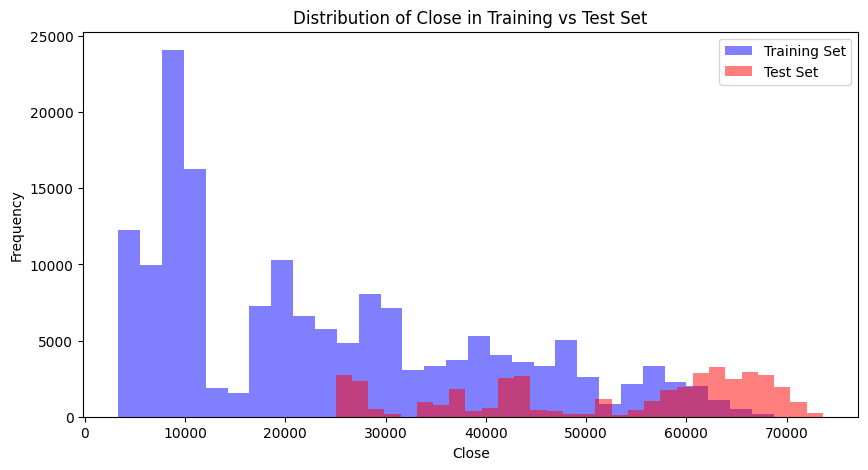

In [20]:
import matplotlib.pyplot as plt

# Example feature distribution comparison: 'ema_12' for both train and test sets
plt.figure(figsize=(10, 5))
plt.hist(df_train['Close'], bins=30, alpha=0.5, label='Training Set', color='blue')
plt.hist(df_test['Close'], bins=30, alpha=0.5, label='Test Set', color='red')
plt.title('Distribution of Close in Training vs Test Set')
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.legend()
plt.show()

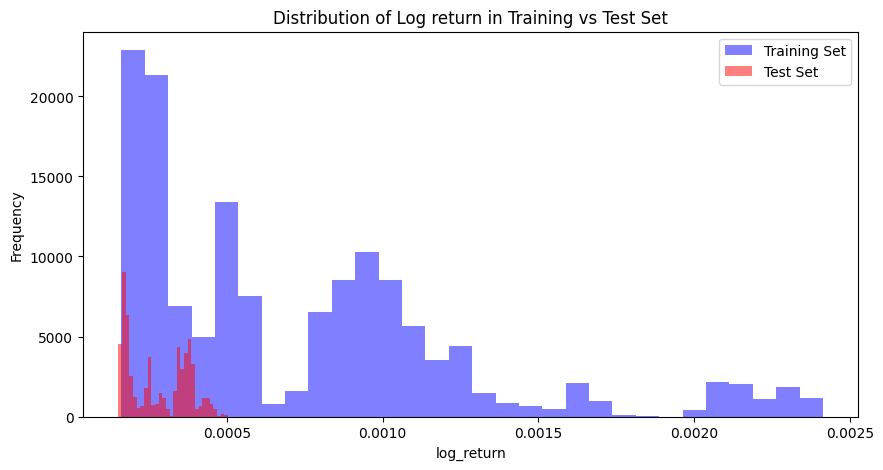

In [30]:
import matplotlib.pyplot as plt

# Example feature distribution comparison: 'ema_12' for both train and test sets
plt.figure(figsize=(10, 5))
plt.hist(df_train['log_return'], bins=30, alpha=0.5, label='Training Set', color='blue')
plt.hist(df_test['log_return'], bins=30, alpha=0.5, label='Test Set', color='red')
plt.title('Distribution of Log return in Training vs Test Set')
plt.xlabel('log_return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/tmp/ipykernel_7158/3380244484.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['log_return'], label='Training Set', color='blue', shade=True)
/tmp/ipykernel_7158/3380244484.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test['log_return'], label='Test Set', color='red', shade=True)


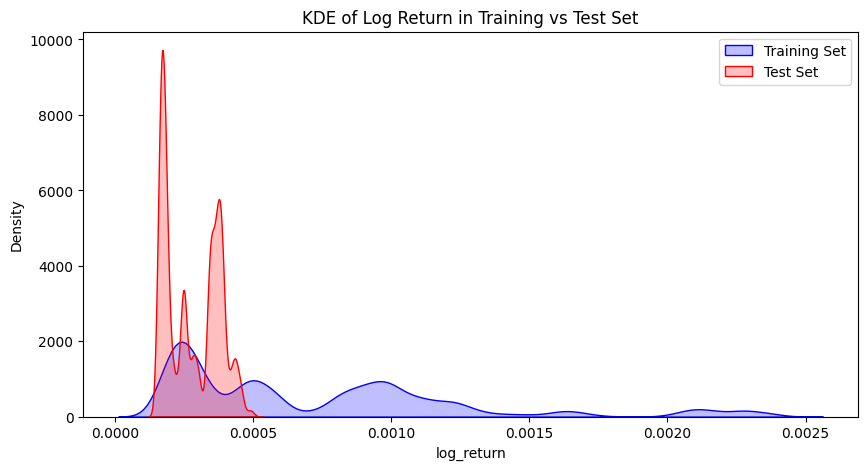

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(df_train['log_return'], label='Training Set', color='blue', shade=True)
sns.kdeplot(df_test['log_return'], label='Test Set', color='red', shade=True)
plt.title('KDE of Log Return in Training vs Test Set')
plt.xlabel('log_return')
plt.legend()
plt.show()


In [33]:
# Check for NaNs or infinite values in training and test sets
print(f"NaNs in df_train['log_return']: {df_train['log_return'].isna().sum()}")
print(f"NaNs in df_test['log_return']: {df_test['log_return'].isna().sum()}")

# Check for infinite values
print(f"Infinite values in df_train['log_return']: {np.isinf(df_train['log_return']).sum()}")
print(f"Infinite values in df_test['log_return']: {np.isinf(df_test['log_return']).sum()}")

# Option 1: Remove rows with NaN or infinite values
df_train_clean = df_train['log_return'].replace([np.inf, -np.inf], np.nan).dropna()
df_test_clean = df_test['log_return'].replace([np.inf, -np.inf], np.nan).dropna()

# Option 2: Alternatively, you can impute the NaNs with the mean or median
# df_train_clean = df_train['log_return'].fillna(df_train['log_return'].mean())
# df_test_clean = df_test['log_return'].fillna(df_test['log_return'].mean())

# Perform the Kolmogorov-Smirnov test again
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(df_train_clean, df_test_clean)

print(f"K-S Statistic: {ks_stat}")
print(f"P-Value: {p_value}")


NaNs in df_train['log_return']: 0
NaNs in df_test['log_return']: 1
Infinite values in df_train['log_return']: 0
Infinite values in df_test['log_return']: 0
K-S Statistic: 0.6005339782673782
P-Value: 0.0


If the p-value is higher (e.g., greater than 0.05), it would suggest that the distributions are statistically similar.

In [32]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(df_train['log_return'], df_test['log_return'])

print(f"K-S Statistic: {ks_stat}")
print(f"P-Value: {p_value}")

K-S Statistic: nan
P-Value: nan


## Training set and test set: 70/30

In [22]:
length = df.shape[0]

train_length = math.floor(length * 0.7)

df_train = df[:train_length]
df_test = df[train_length + 1:]

In [23]:
df_train.describe()

,Timestamp,Open,High,Low,Close,Volume,log_return
count,142275,142275.000000,142275.000000,142275.000000,142275.000000,142275.000000,142275.000000
mean,2021-01-12 21:58:03.928307456,23433.435214,23496.929796,23367.836543,23433.569982,885.721597,0.000732
min,2019-01-01 00:00:00,3366.630000,3373.840000,3349.920000,3366.410000,0.000000,0.000162
25%,2020-01-07 17:22:30,9154.335000,9166.745000,9140.000000,9154.365000,286.676088,0.000274
50%,2021-01-13 02:15:00,17171.270000,17193.040000,17154.940000,17171.270000,500.420303,0.000568
75%,2022-01-19 06:37:30,38514.170000,38626.915000,38400.000000,38513.915000,997.518047,0.000996
max,2023-01-24 18:45:00,68718.890000,69000.000000,68480.000000,68718.900000,40371.405060,0.002413
std,NaN,17416.395942,17467.647123,17363.703217,17416.317389,1184.090752,0.000534


In [24]:
df_test.describe()

,Timestamp,Open,High,Low,Close,Volume,log_return
count,60974,60974.000000,60974.000000,60974.000000,60974.000000,60974.000000,60973.000000
mean,2023-12-08 10:00:33.904615168,43738.411706,43809.109204,43664.471642,43739.166269,670.736546,0.000279
min,2023-01-24 19:15:00,19622.770000,19687.730000,19549.090000,19621.660000,0.000000,0.000152
25%,2023-07-02 15:18:45,27719.540000,27770.567500,27676.082500,27720.247500,156.787323,0.000178
50%,2023-12-08 10:07:30,40829.740000,40943.250000,40717.140000,40830.950000,276.627525,0.000260
75%,2024-05-15 04:56:15,61892.387500,61981.452500,61779.655000,61894.192500,563.340058,0.000369
max,2024-10-20 23:45:00,73607.800000,73777.000000,73400.000000,73607.800000,29961.474690,0.000504
std,NaN,16880.055464,16914.776375,16843.298549,16880.153988,1299.336478,0.000096


/tmp/ipykernel_7158/1491391007.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train['Close'], label='Training Set', color='blue', shade=True)
/tmp/ipykernel_7158/1491391007.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test['Close'], label='Test Set', color='red', shade=True)


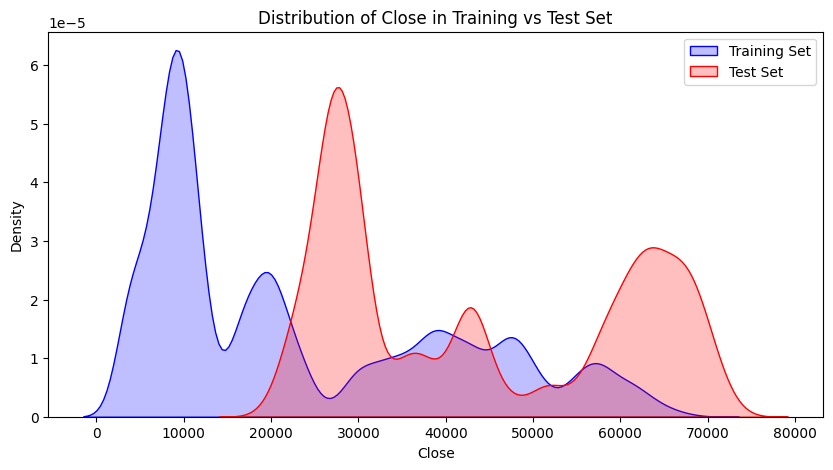

In [26]:
import seaborn as sns

# KDE plot for feature 'ema_12'
plt.figure(figsize=(10, 5))
sns.kdeplot(df_train['Close'], label='Training Set', color='blue', shade=True)
sns.kdeplot(df_test['Close'], label='Test Set', color='red', shade=True)
plt.title('Distribution of Close in Training vs Test Set')
plt.xlabel('Close')
plt.legend()
plt.show()

## Training set and test set: 90/10